In [1]:
import numpy as np
import pandas as pd
from google.colab import drive

In [2]:
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Colab Notebooks/Credit Card Customer Data.csv'
df = pd.read_csv(file_path)

Mounted at /content/drive


In [7]:
# Drop any unnecessary columns
df = df.drop(columns=['Sl_No', 'Customer Key'])

# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)



In [8]:
# K-Means implementation
def initialize_centroids(X, k):
    np.random.seed(42)
    random_indices = np.random.permutation(X.shape[0])
    centroids = X[random_indices[:k]]
    return centroids

def closest_centroid(X, centroids):
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

def move_centroids(X, closest, centroids):
    return np.array([X[closest == k].mean(axis=0) for k in range(centroids.shape[0])])

def kmeans(X, k, max_iters=100):
    centroids = initialize_centroids(X, k)
    for i in range(max_iters):
        closest = closest_centroid(X, centroids)
        centroids = move_centroids(X, closest, centroids)
    return closest, centroids

In [9]:
# Determine the optimal number of clusters using the Silhouette score
from sklearn.metrics import silhouette_score

def find_optimal_k(X, max_k=10):
    scores = []
    for k in range(2, max_k+1):
        clusters, _ = kmeans(X, k)
        score = silhouette_score(X, clusters)
        scores.append((k, score))
    return scores

# Find the optimal number of clusters
scores = find_optimal_k(df_scaled, max_k=10)
optimal_k = max(scores, key=lambda x: x[1])[0]

# Apply K-Means with optimal k
clusters, centroids = kmeans(df_scaled, optimal_k)

# Add cluster labels to the original data
df['Cluster'] = clusters

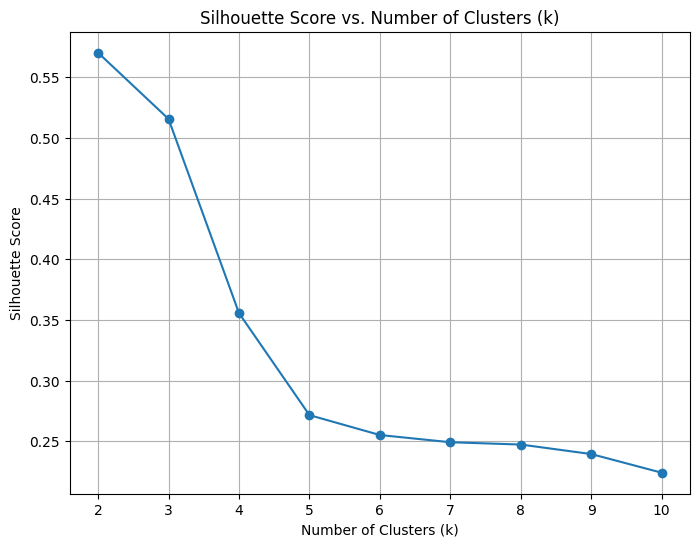

The optimal number of clusters is: 2


In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Function to find optimal k and plot Silhouette score
def find_optimal_k(X, max_k=10):
    scores = []
    for k in range(2, max_k+1):
        clusters, _ = kmeans(X, k)
        score = silhouette_score(X, clusters)
        scores.append((k, score))
    return scores

# Find the optimal number of clusters
scores = find_optimal_k(df_scaled, max_k=10)

# Extract k values and corresponding silhouette scores
k_values = [score[0] for score in scores]
silhouette_scores = [score[1] for score in scores]

# Plot Silhouette scores for each k
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Find the optimal k (the one with the highest silhouette score)
optimal_k = max(scores, key=lambda x: x[1])[0]
print(f'The optimal number of clusters is: {optimal_k}')


In [13]:
# Linear Regression to predict Avg_Credit_Limit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define the target and features
X = df.drop(columns=['Avg_Credit_Limit'])
y = df['Avg_Credit_Limit']


In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Identify key features
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print(coefficients)

Mean Squared Error: 425349381.6627527
               Feature    Coefficient
0   Total_Credit_Cards    2414.686722
1    Total_visits_bank     -23.654253
2  Total_visits_online   -1261.666567
3     Total_calls_made   -1463.895479
4              Cluster -116000.306485
